In [3]:
import pandas as pd

df = pd.read_csv('hulu_titles.csv')

In [5]:
df.head
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3073 non-null   object 
 1   type          3073 non-null   object 
 2   title         3073 non-null   object 
 3   director      3 non-null      object 
 4   cast          0 non-null      float64
 5   country       1620 non-null   object 
 6   date_added    3045 non-null   object 
 7   release_year  3073 non-null   int64  
 8   rating        2553 non-null   object 
 9   duration      2594 non-null   object 
 10  listed_in     3073 non-null   object 
 11  description   3069 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 288.2+ KB


,cast,release_year
count,0.0,3073.000000
mean,NaN,2012.567524
std,NaN,10.844069
min,NaN,1923.000000
25%,NaN,2010.000000
50%,NaN,2016.000000
75%,NaN,2019.000000
max,NaN,2021.000000


In [6]:
# Check for missing values in each column
print(df.isnull().sum())

# Example: Fill missing values with "Unknown" for columns where it makes sense
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)


show_id            0
type               0
title              0
director        3070
cast            3073
country         1453
date_added        28
release_year       0
rating           520
duration         479
listed_in          0
description        4
dtype: int64


/tmp/ipykernel_412720/4040107552.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipykernel_412720/4040107552.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

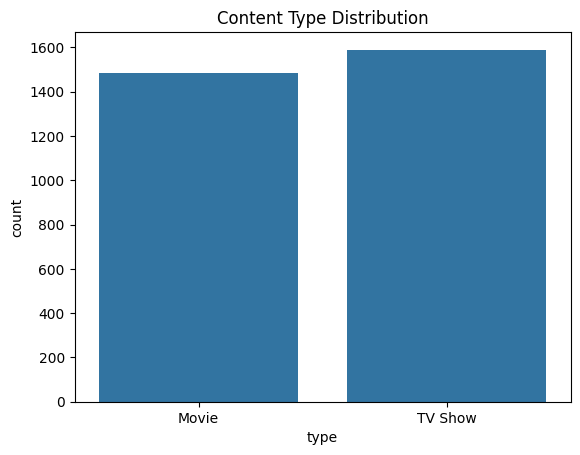

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='type', data=df)
plt.title('Content Type Distribution')
plt.show()


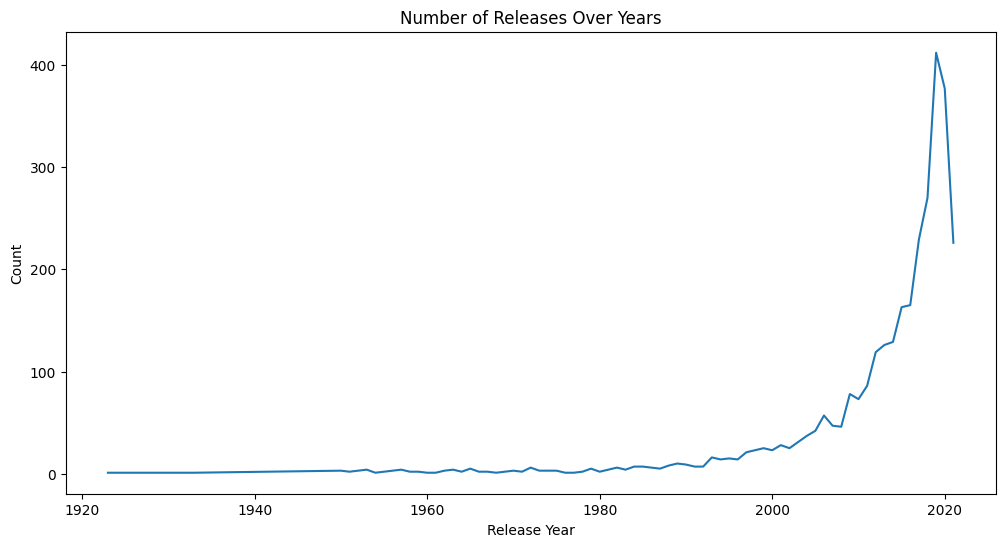

In [8]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12, 6))
plt.title('Number of Releases Over Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


/tmp/ipykernel_412720/3521558750.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts.index[:10], x=genre_counts.values[:10], palette='Set2')


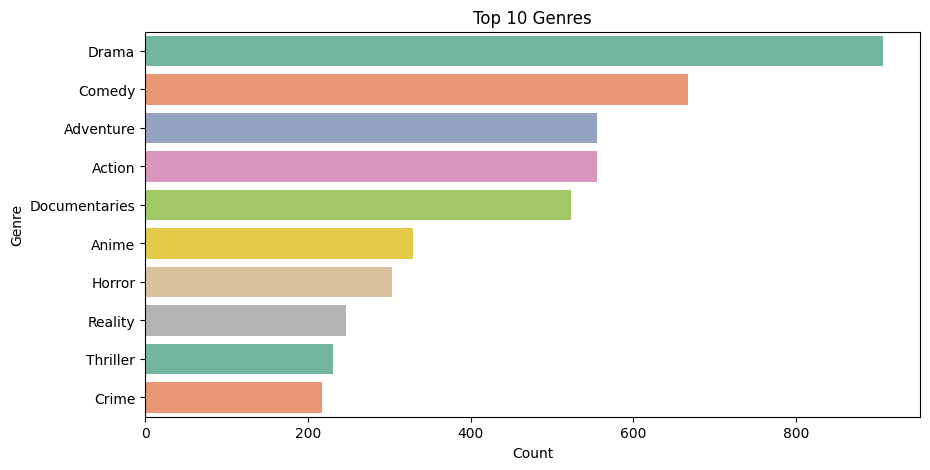

In [11]:
# Split the genres by comma, strip spaces, and explode into separate rows
df_genres = df['listed_in'].str.split(', ').explode().str.strip()

# Count the frequency of each genre
genre_counts = df_genres.value_counts()

# Plot the most common genres
plt.figure(figsize=(10, 5))
sns.barplot(y=genre_counts.index[:10], x=genre_counts.values[:10], palette='Set2')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
